<a href="https://colab.research.google.com/github/RahulRajeev88/-ML-Projects/blob/master/Student_Marks_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Life cycle of Machine learning Project**


1.   Understanding the Problem Statement
2.   Data Collection
3.   Data Checks to perform
4.   Exploratory data analysis
5.   Data Pre-Processing
6.   Model Training
7.   Choose best model






**Problem statement**


> This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


    

**2) Data Collection**

   

*   Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
*   The data consists of 8 column and 1000 rows.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
#Check the number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#Statistics of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights-

From above description of numerical data, all the means are very close to each other.

All std. dev. are also very close.

While the min. score in maths is 0 and for writing is 10 and for reading it is 17.

### **EXPLORING DATA**

In [10]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [11]:
#define numerical and categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object']
print(f"There are {len(numerical_features)} numerical features naming {numerical_features}")
print(f"There are {len(categorical_features)} categorical features naming {categorical_features}")

There are 3 numerical features naming ['math_score', 'reading_score', 'writing_score']
There are 5 categorical features naming ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# **Adding columns for total score and average score**

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#to know the number of students with full marks
math_full=df[df['math_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
reading_full=df[df['reading_score']==100]['reading_score'].count()

print(f"Number of students who got full marks in maths is:",math_full)
print(f"Number of students who got full marks in writing is:",writing_full)
print(f"Number of students who got full marks in reading is:",reading_full)

Number of students who got full marks in maths is: 7
Number of students who got full marks in writing is: 14
Number of students who got full marks in reading is: 17


In [15]:
#to know the number of students who got <=20
math_full=df[df['math_score']<=20]['average_score'].count()
writing_full=df[df['writing_score']<=20]['average_score'].count()
reading_full=df[df['reading_score']<=20]['reading_score'].count()

print(f"Number of students who got less than or equal to 20 in maths is:",math_full)
print(f"Number of students who got less than or equal to 20 in writing is:",writing_full)
print(f"Number of students who got less than or equal to 20 in reading is:",reading_full)

Number of students who got less than or equal to 20 in maths is: 4
Number of students who got less than or equal to 20 in writing is: 3
Number of students who got less than or equal to 20 in reading is: 1


# **Insights**
# from above results we can say that students has performed worst in maths
# the best performance was in Reading section.

# **EXPLORING DATA BY VISUALIZATION**

Visualizing the average score distribution to make some conclusion with the help of

Histogram

&

Kernel Distribution Function (KDE)

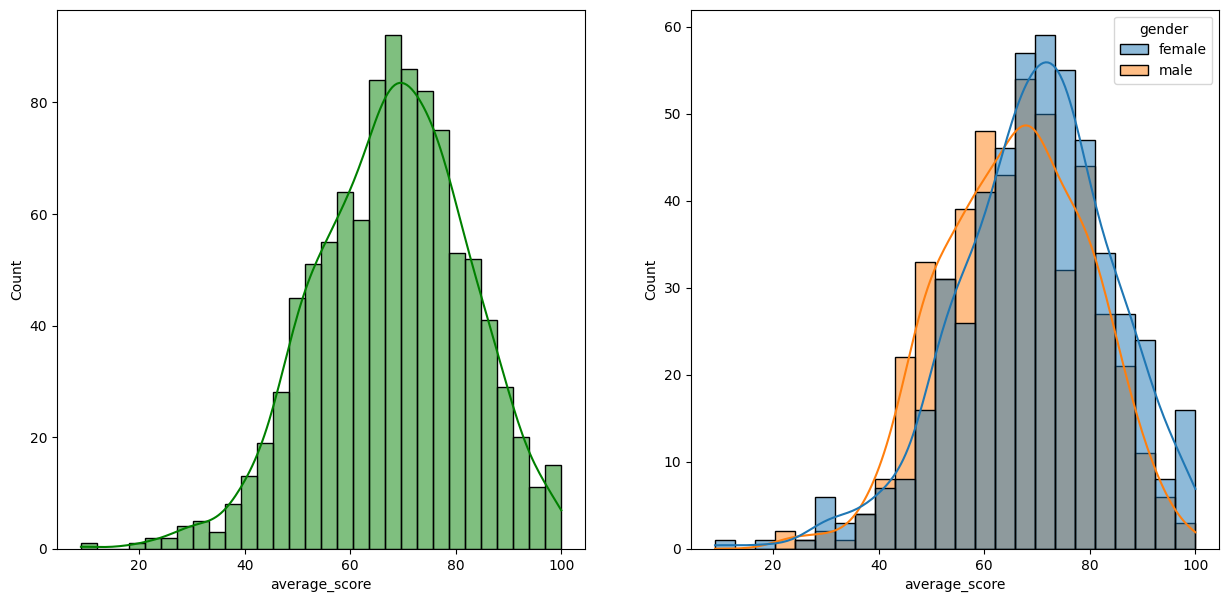

In [16]:
# with respect to average.
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()


<Axes: xlabel='total_score', ylabel='Count'>

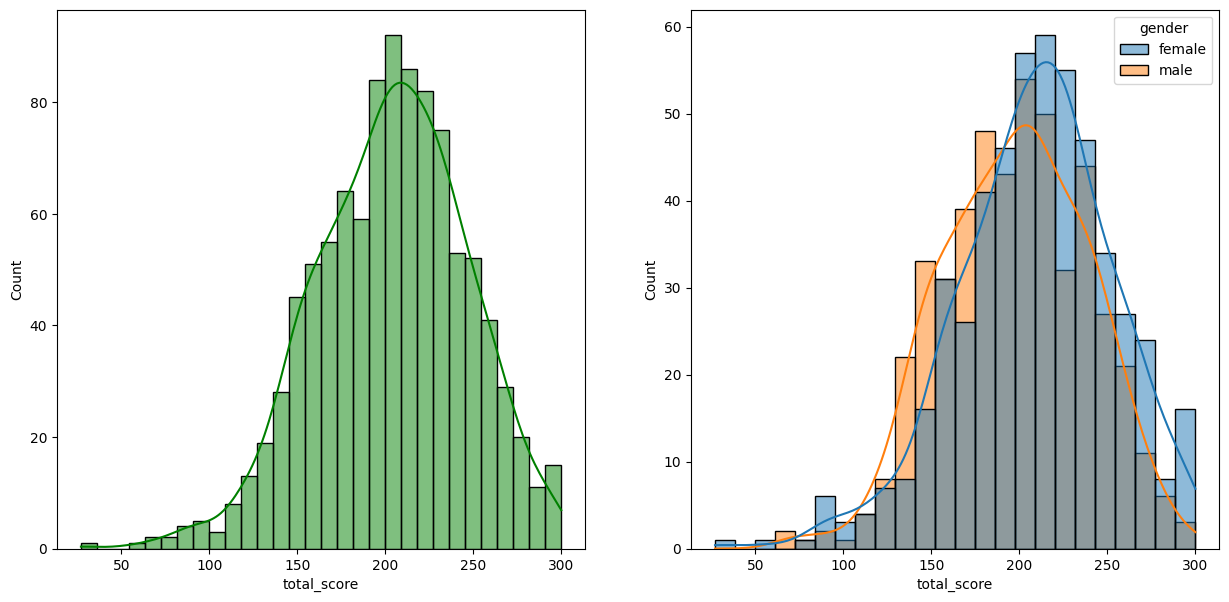

In [17]:
# with respect to total score.
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score', bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score', kde=True,hue='gender')


**Insight:**

Females performed well in both average score and total score.

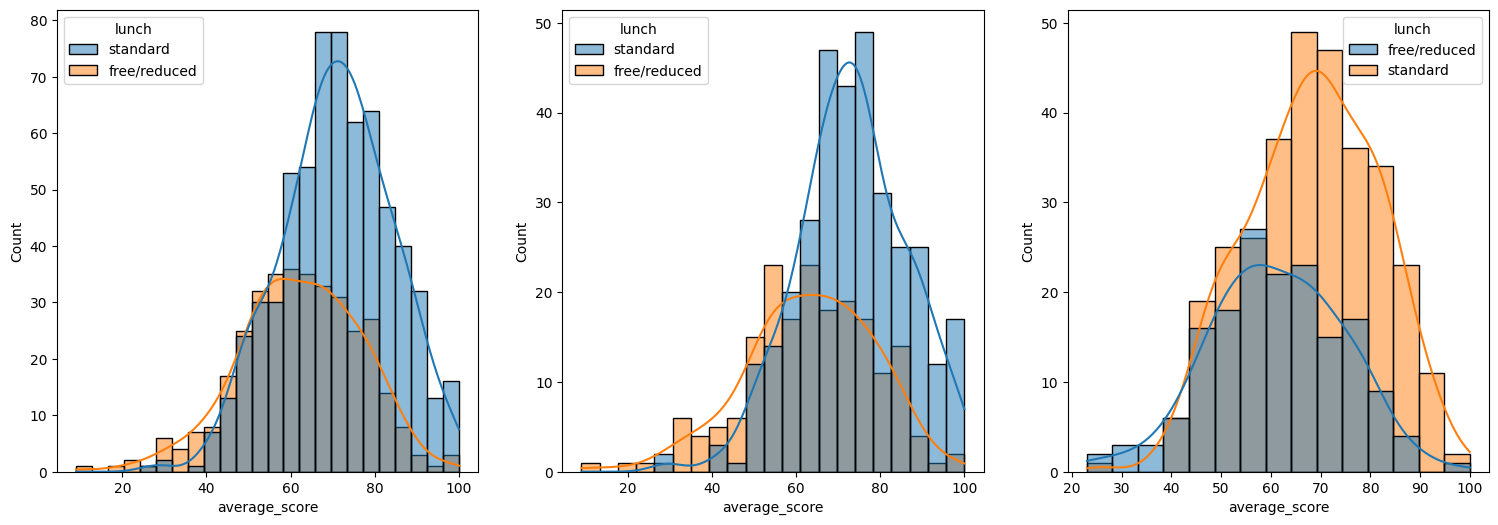

In [18]:
#Analysis w.r.t average score & lunch
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

**Insights**

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

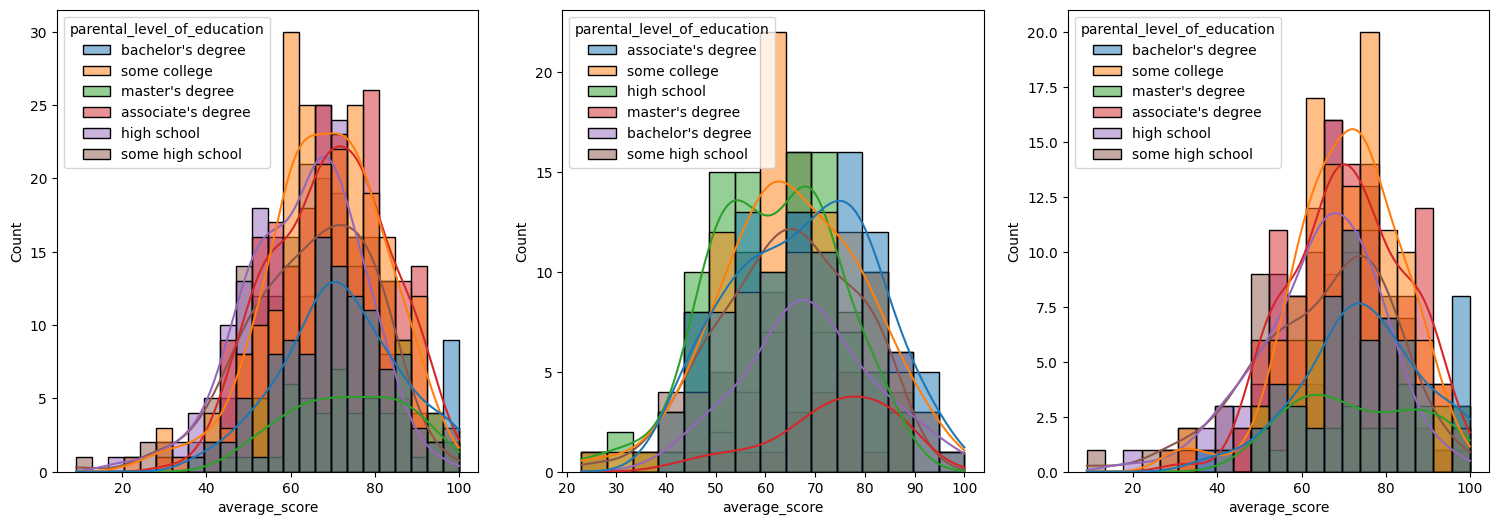

In [19]:
#with respect to parental level of education
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()


**Insights**



*   In general, parental education does not help students perform well in exams.
*   The second plot shows that parents with an associate's degree or master's degree tend to have sons who perform well in exams.
*   The third plot shows that parental education has no effect on the performance of female students in exams.


   

# **Maximum score of students in all three subjects**

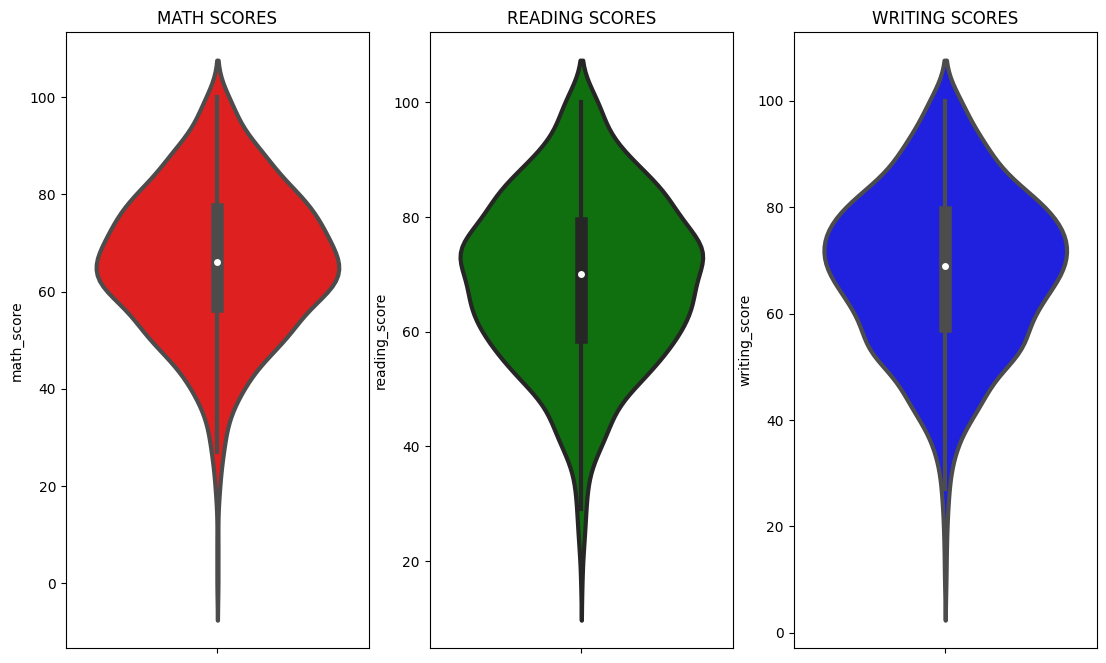

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


# **Multivariate analysis using Pieplot**

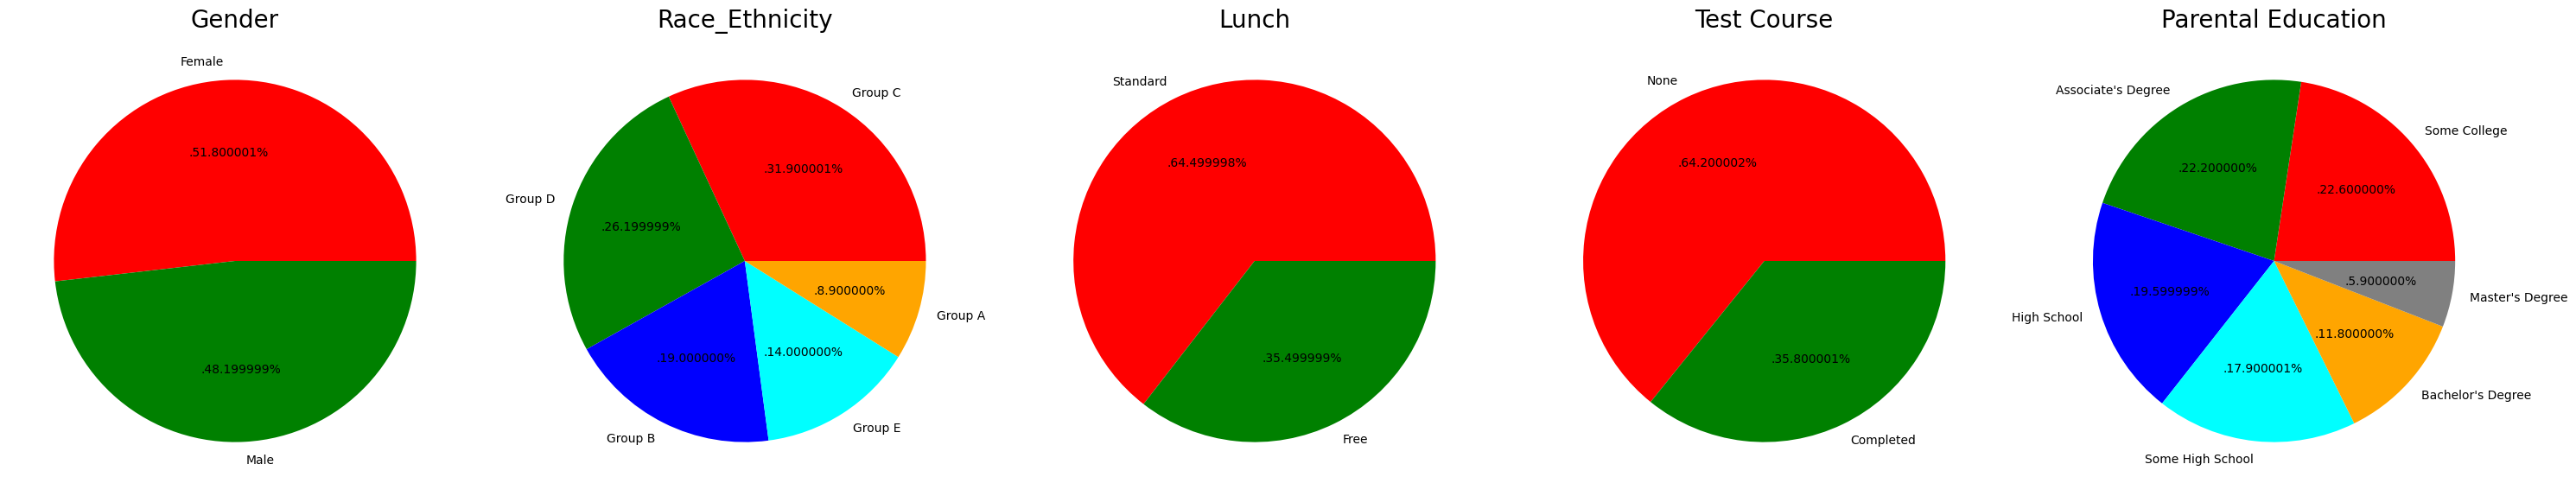

In [21]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



Insights:

Number of Male and Female students is almost equal.

Number students are greatest in Group C.

Number of students who have standard lunch are greater.

Number of students who have not enrolled in any test preparation course is greater.

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

# **Feature wise Visualization**

1-) GENDER COLUMN

How is distribution of Gender ?

Is gender has any impact on student's performance ?

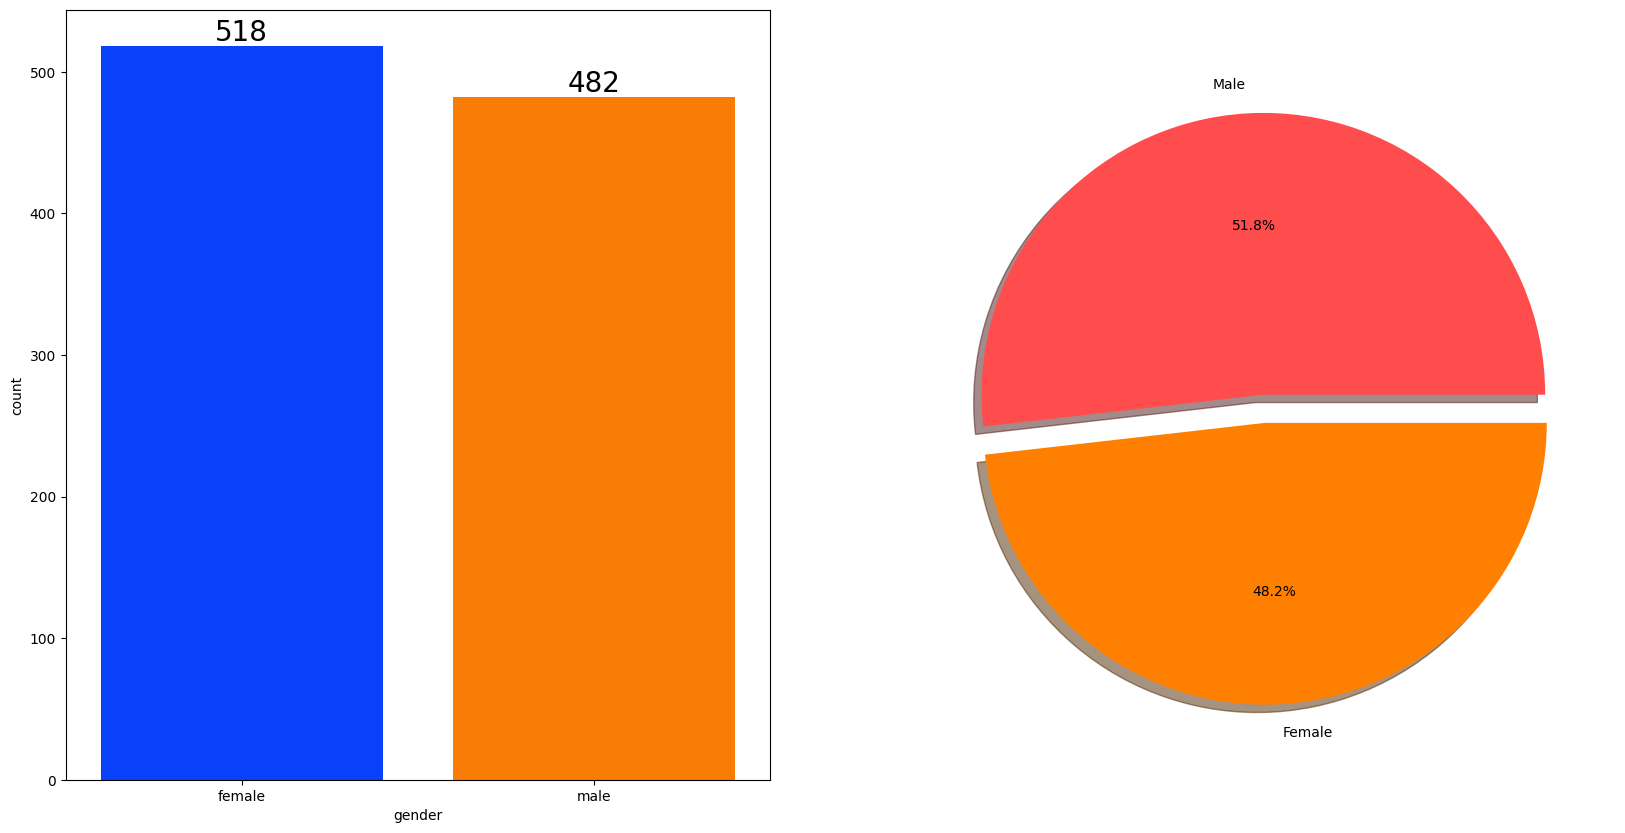

In [22]:
#Univariate Analysis (How is distribution of Gender?)
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

In [23]:
#BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)
gender_group=df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


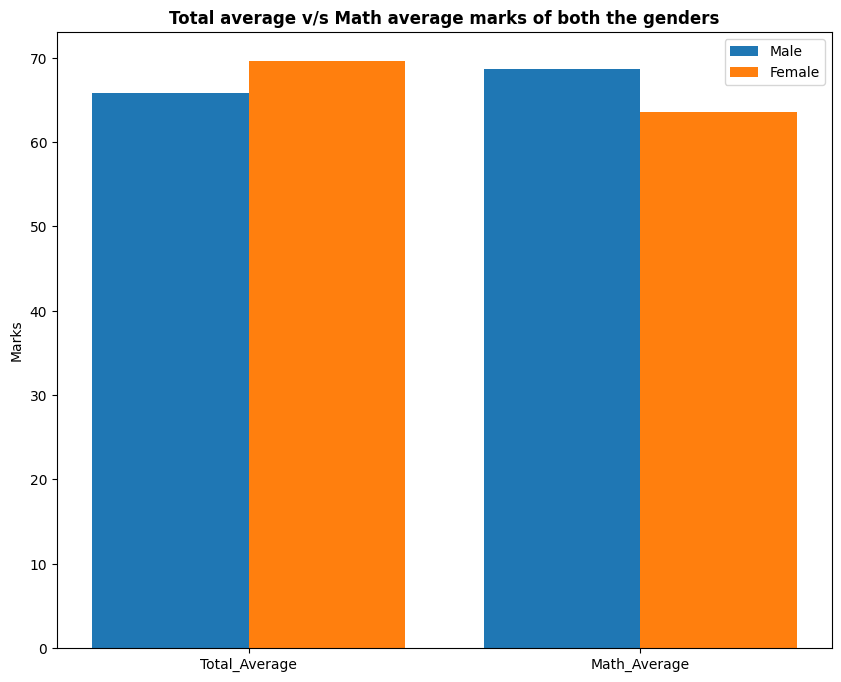

In [24]:
plt.figure(figsize=(10,8))
X=['Total_Average','Math_Average']
female_scores=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average_score'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))
plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title('Total average v/s Math average marks of both the genders',fontweight='bold')
plt.legend()
plt.show()

**Insights**

On average, females have a better overall score than males.

However, males have scored higher in mathematics.

# **2-) RACE/EHNICITY COLUMN**

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

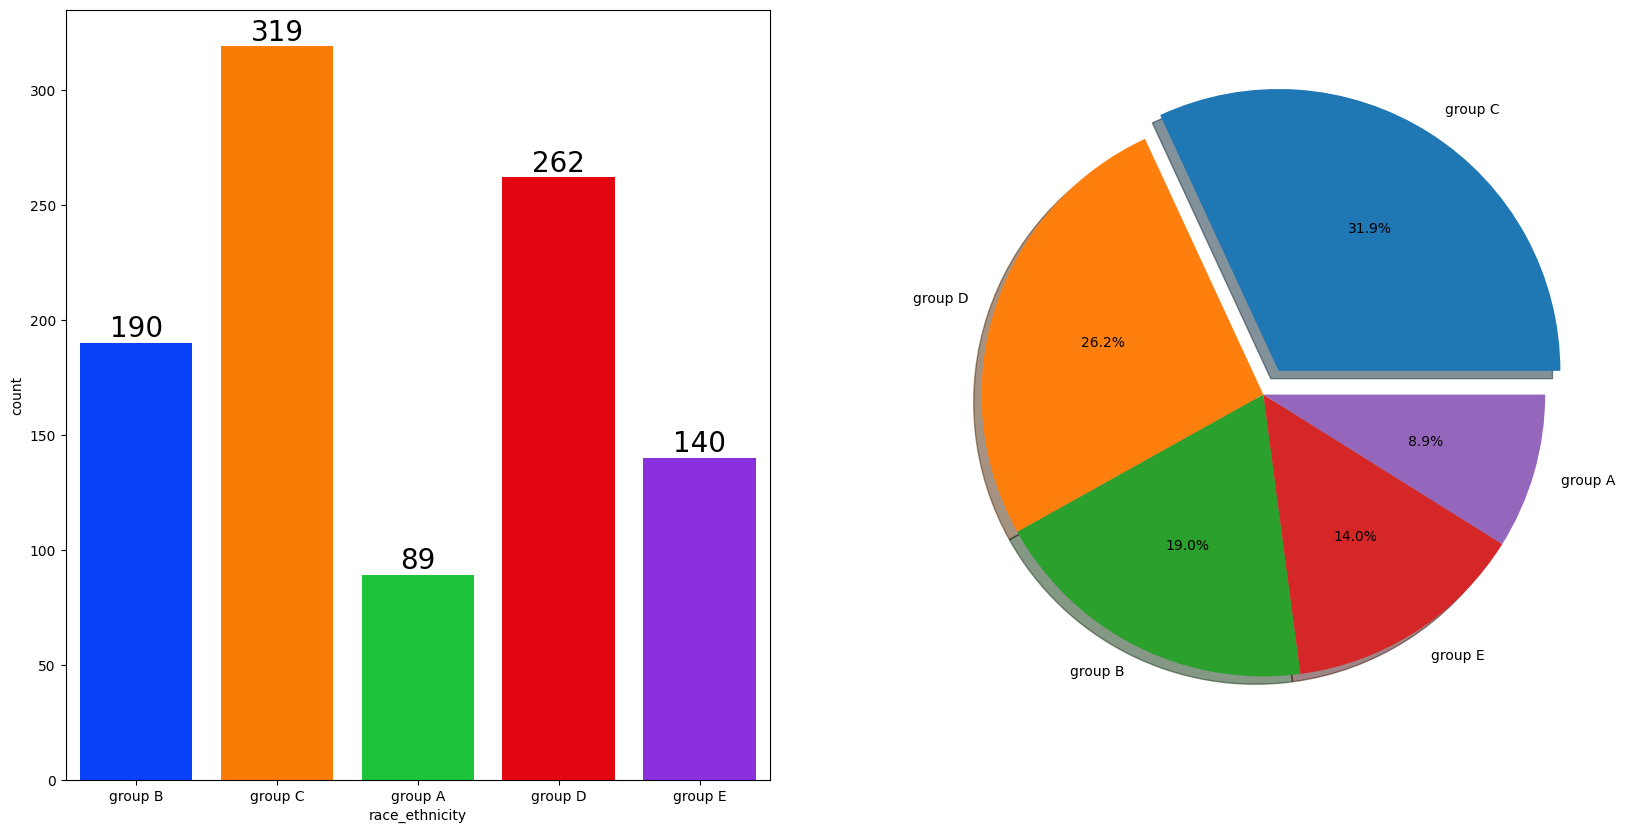

In [25]:
#UNIVARIATE ANALYSIS ( How is Group wise distribution ?)
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()



**Insights**

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.





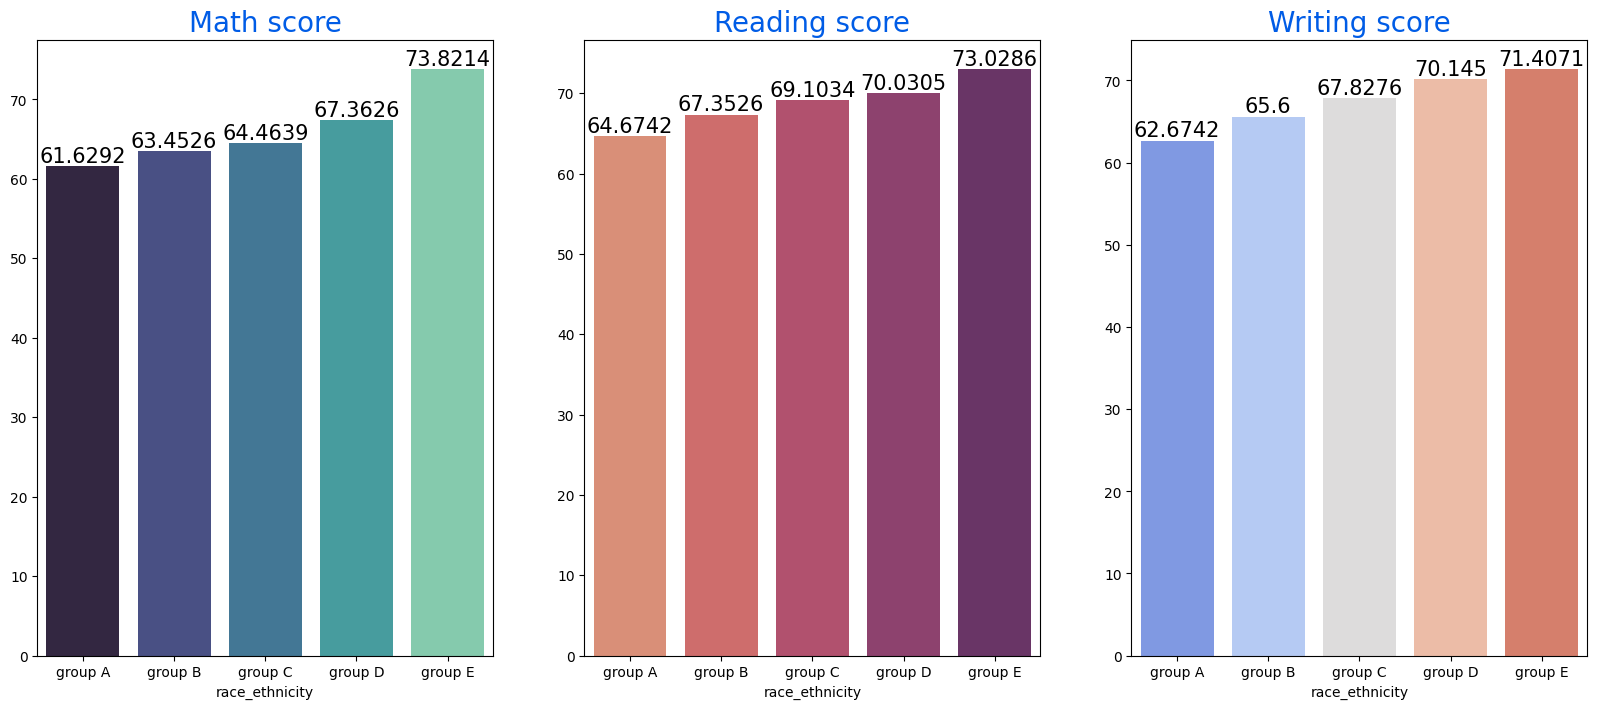

In [26]:
#BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

# **Checking Outliers**

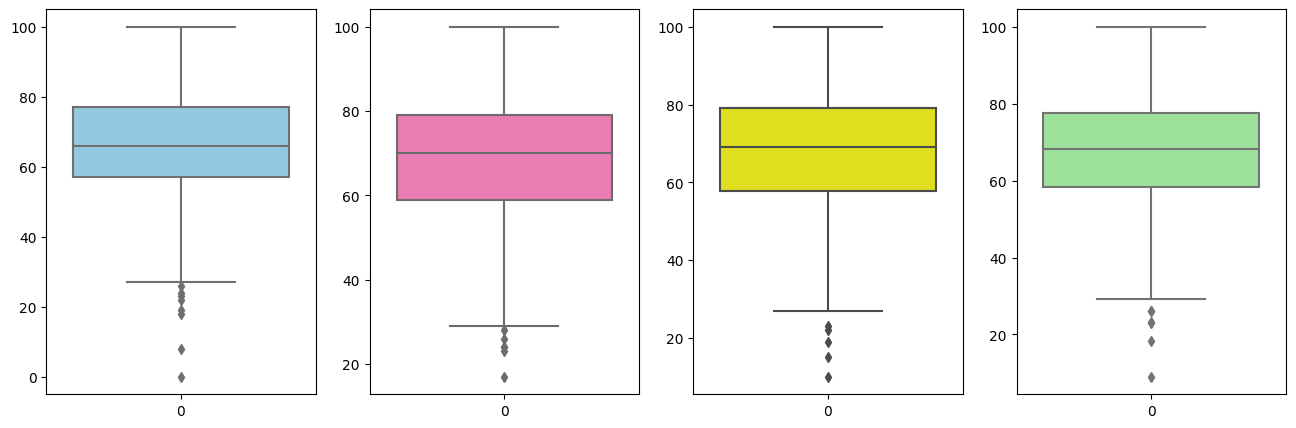

In [27]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()



# **MUTIVARIATE ANALYSIS USING PAIRPLOT**

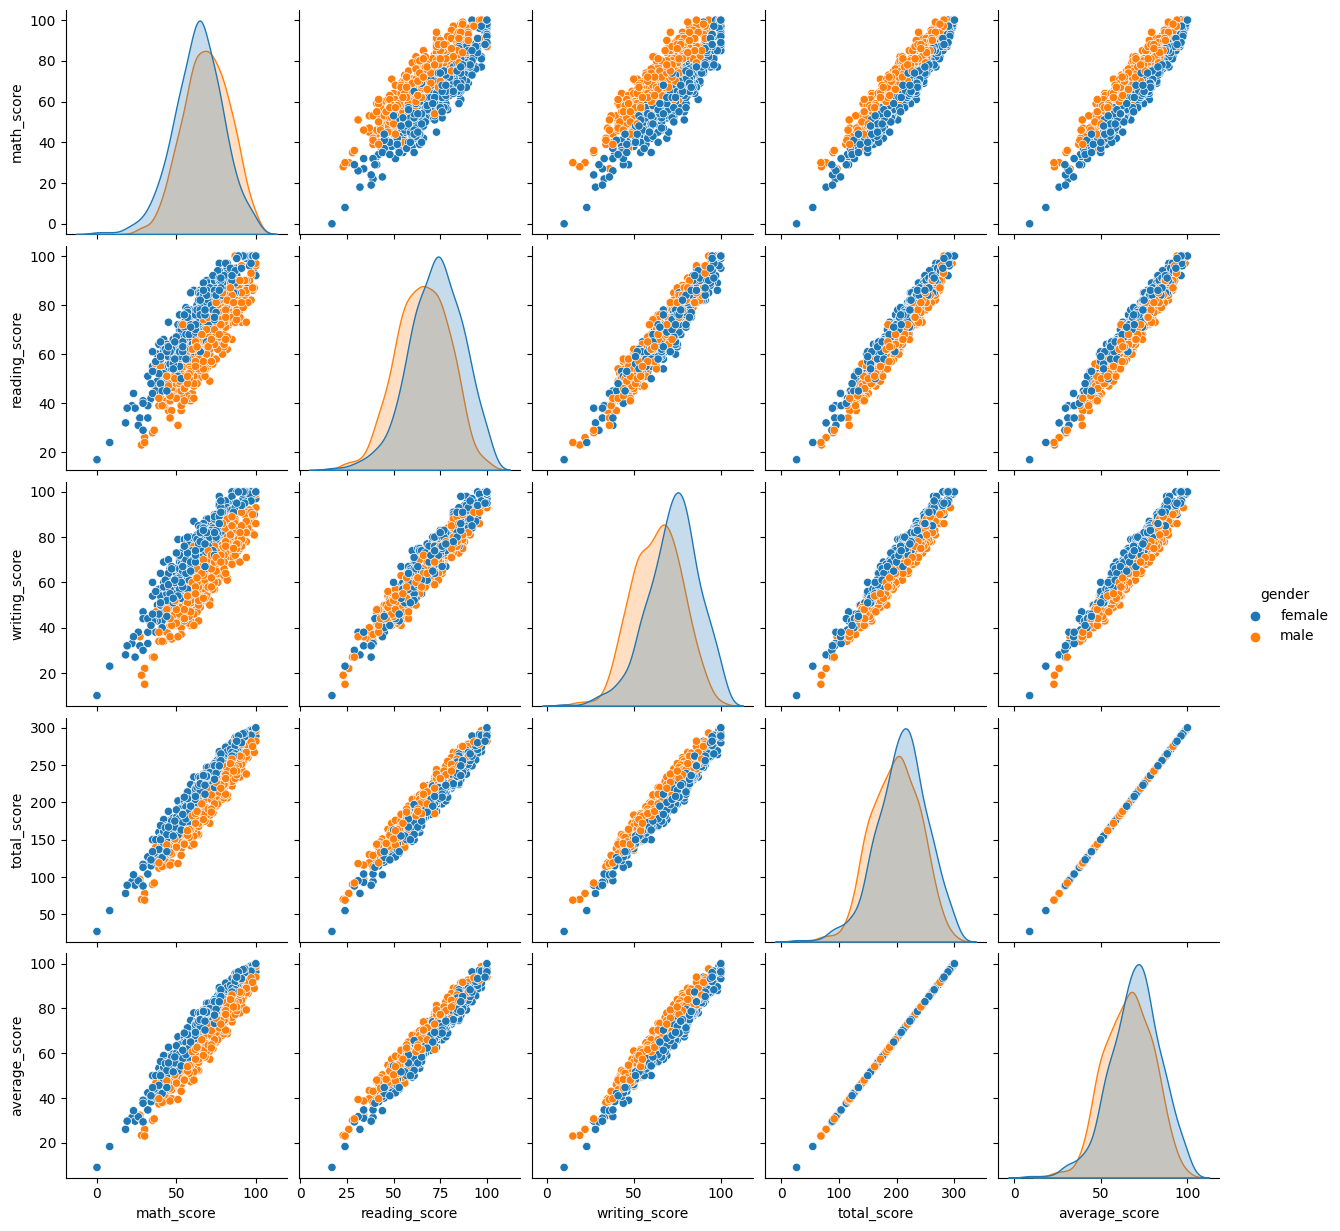

In [28]:
sns.pairplot(df,hue = 'gender')
plt.show()


**Insights**

From the above plot it is clear that all the scores increase linearly with each other.






**Conclusions**

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.


In [47]:
!pip3 install catboost

# **Modelling The Data**

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor



In [49]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
x = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [51]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [52]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [53]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:    ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:     ['female' 'male']
Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']


In [54]:
# Create column Transformer with 3 types of transformer

num_features = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
categoric_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [('one_hot_encoder',categoric_transformer,cat_features),
    ('Standard_scaler',numeric_transformer,num_features)]
)



In [55]:
x=preprocessor.fit_transform(x)

In [56]:
#Splitting dataset into training & test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 21), (200, 21))

In [63]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2_scores=r2_score(true,predicted)
  return mae,rmse,r2_scores


In [64]:

models={
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(verbose=False),
    'AdaBoost Regressor':AdaBoostRegressor()

}

In [65]:
model_list=[]
r2_list=[]
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)
  model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
  print('Model performance for Training set')
  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
Model performance for Training set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


Ridge
Model performance for Training set
Model performance for Training set
- Root Mean Squared Error: 0.3396
- Mean Absolute Error: 0.2724
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3432
- Mean Absolute Error: 0.2684
- R2 Score: 0.9995


K-Neighbors Regressor
Model performance for Training set
M

In [67]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999516
6,XGBRegressor,0.975401
7,CatBoosting Regressor,0.968100
5,Random Forest Regressor,0.963810
4,Decision Tree,0.940741
8,AdaBoost Regressor,0.928675
1,Lasso,0.908560
3,K-Neighbors Regressor,0.889781


# **Linear Regression**

In [69]:
lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score= r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


# **Plot y_pred and y_test**

Text(0, 0.5, 'predicted')

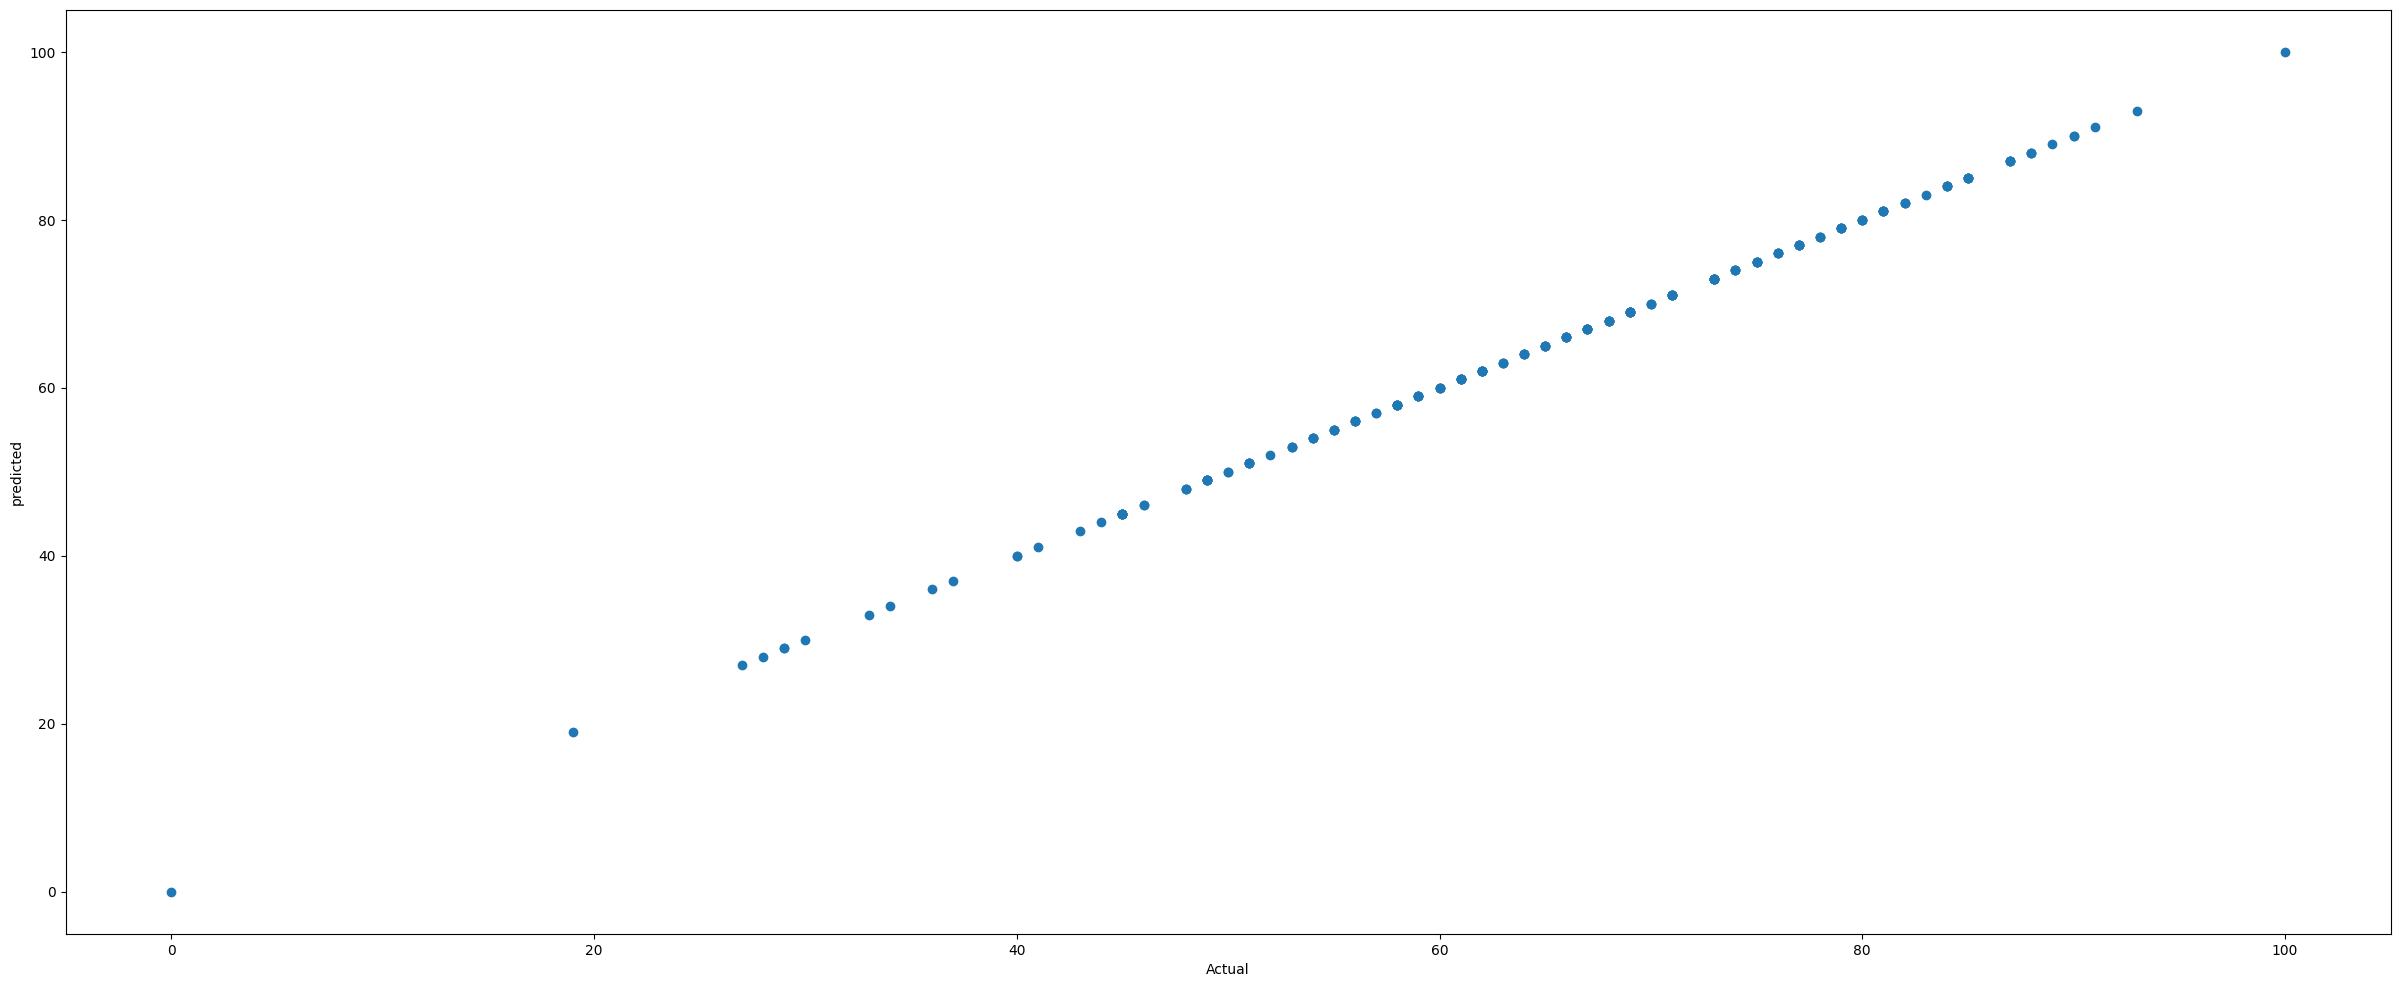

In [71]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted')


<Axes: xlabel='math_score'>

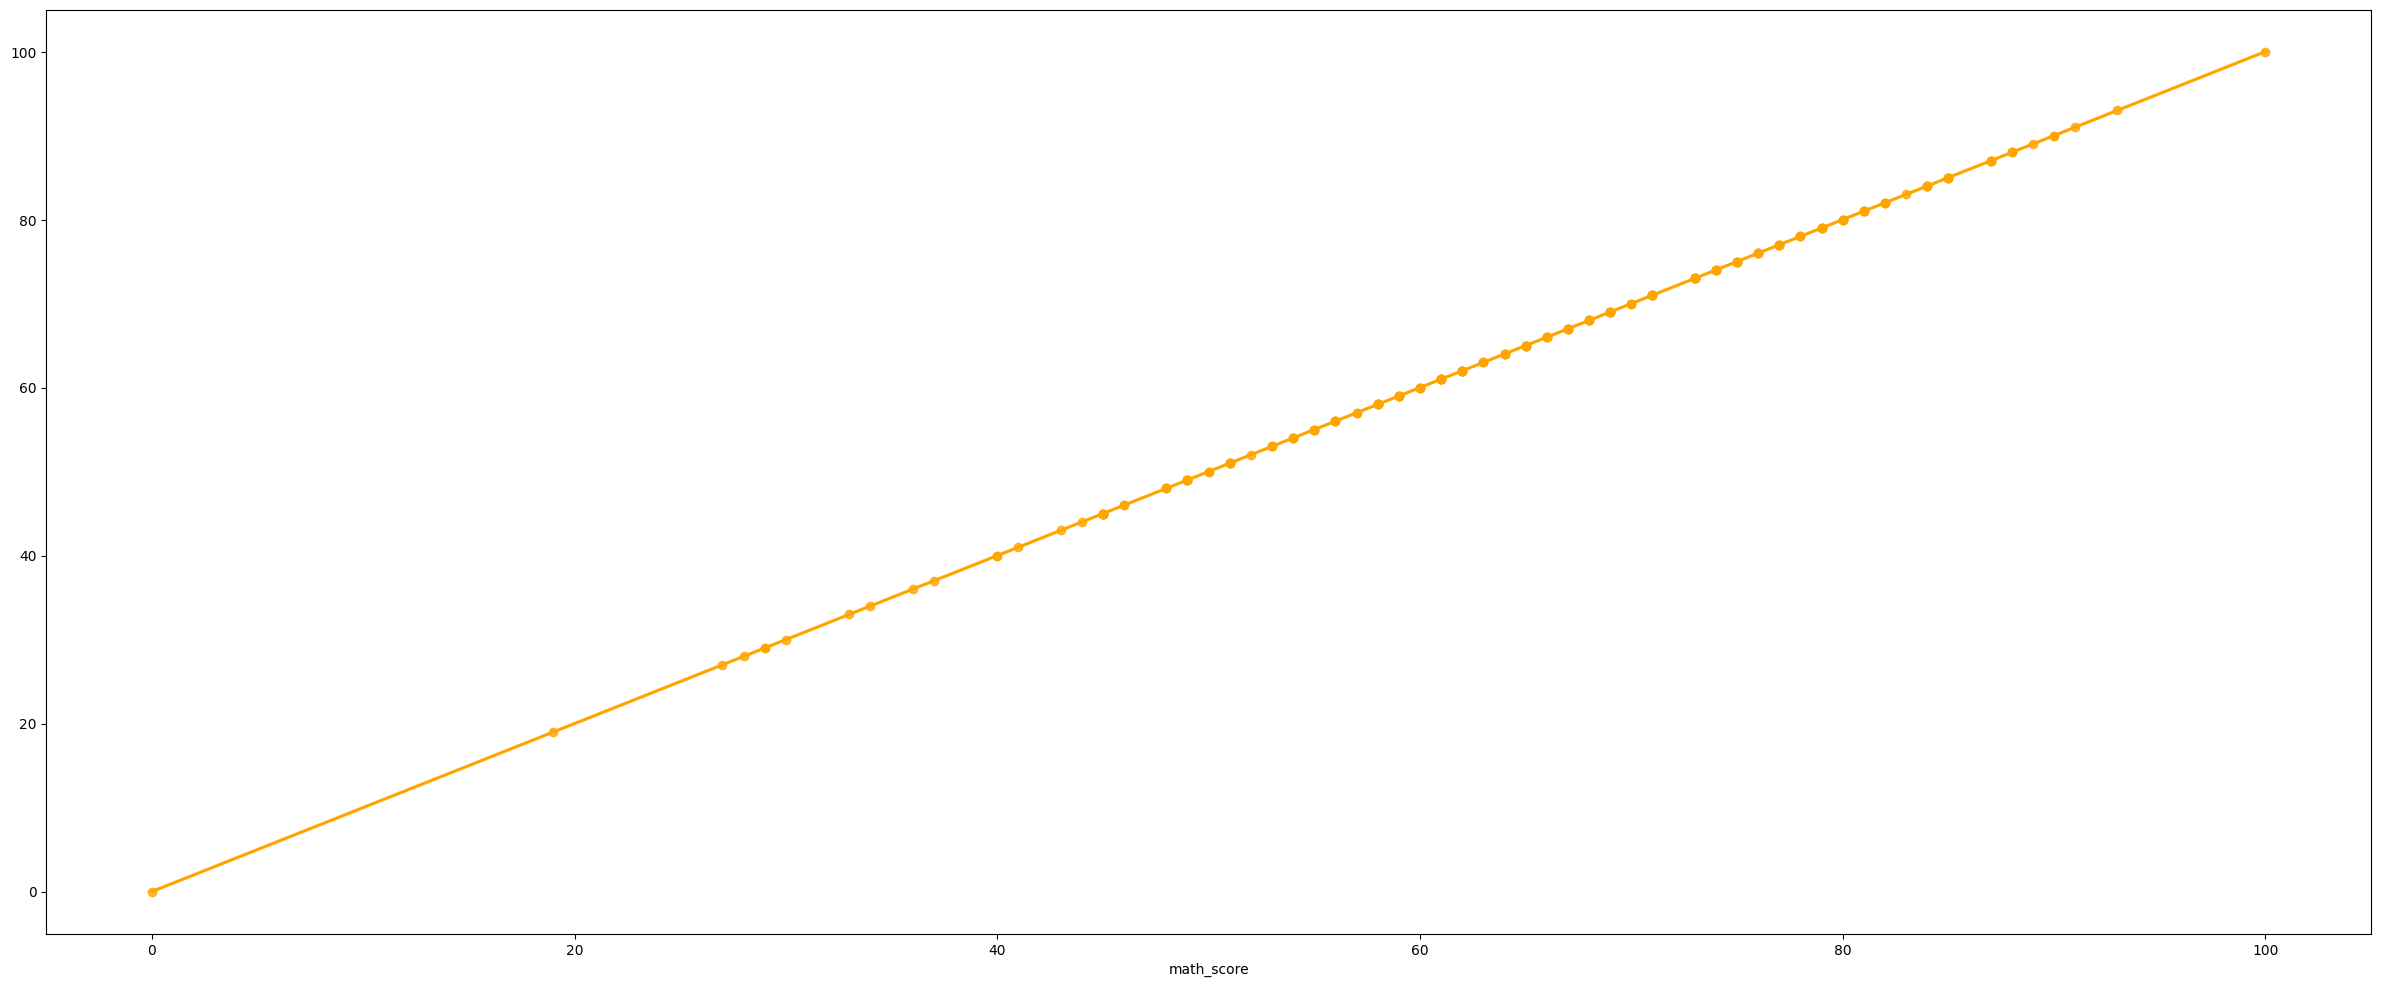

In [74]:
sns.regplot(x=y_test,y=y_pred,ci=None, color='orange')

# **Difference between actual and predicted values**

In [76]:
pred_df=pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred, 'Difference': y_test-y_pred})
pred_df


,Actual_value,Predicted_value,Difference
521,91,91.0,-2.273737e-13
737,53,53.0,2.842171e-14
740,80,80.0,-5.684342e-14
660,74,74.0,-8.526513e-14
411,84,84.0,-1.847411e-13
...,...,...,...
408,52,52.0,2.131628e-13
332,62,62.0,1.563194e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-8.526513e-14
